# Jupyter Data Science Workflow
### From exploratory analysis to reproducible science 
*Naveenan Arjunan*

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [24]:
from juypterWorkflowna.data import get_fremont_data

In [25]:
data=get_fremont_data()

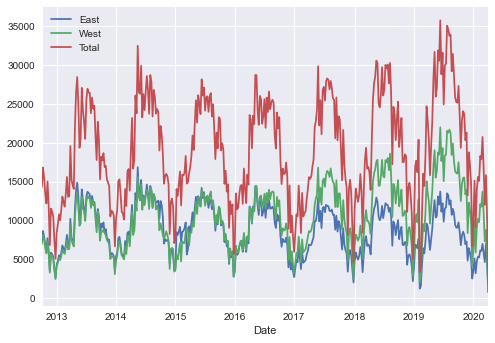

In [26]:
data.resample('W').sum().plot();

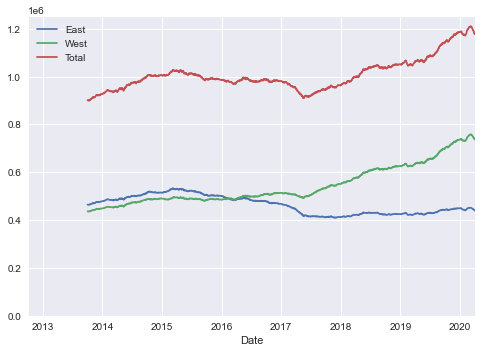

In [27]:
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

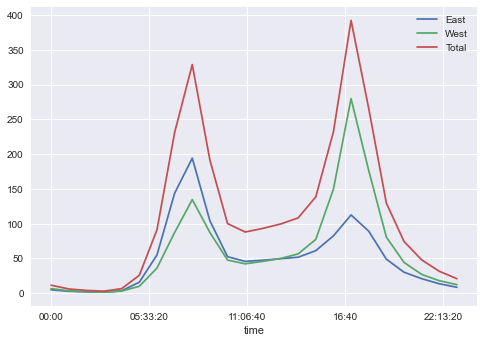

In [28]:
data.groupby(data.index.time).mean().plot();

In [29]:
pivoted=data.pivot_table('Total',index=data.index.time,columns=data.index.date)

pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


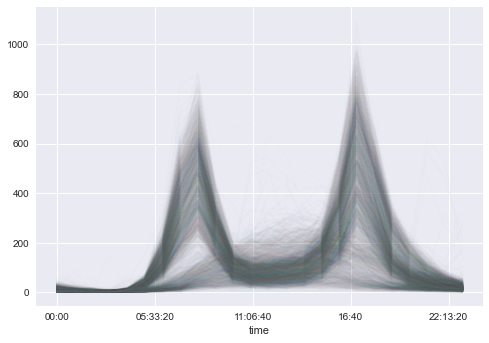

In [30]:
pivoted.plot(legend=False,alpha=0.01);

In [31]:
!pwd

/Users/narjunan/Downloads/Master_data_scientist_ML_Project/do_more_with_twitter_data/examples/timeseries/JupyterWorkflowna


In [32]:
?get_fremont_data